In [19]:
# load packages
import pandas as pd 
import numpy as np

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Visualization

In [3]:
# actual price - white wine 

raw_data = pd.read_csv('../data/wines_sales_prep.csv', sep=",", index_col=[0])
raw_data.drop(raw_data.columns[raw_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_sales = raw_data

df_sales.head(5)

,country,designation,points,price,province,variety,winery,rating,price_bin,rating_n,price_bin_n,wine_type
1,Portugal,Campelo,85,10,Vinho Verde,Portuguese White,Caves Campelo,medium,medium,2,2,white
2,Portugal,Miranda,85,9,Vinho Verde,Portuguese White,Caves Campelo,medium,medium,2,2,white
3,Portugal,Daphne,91,9,Vinho Verde,Loureiro,Casal Paço Padreiro,high,medium,0,2,white
5,Portugal,Casal da Seara,84,10,Vinho Verde,Portuguese White,Caves Campelo,medium,medium,2,2,white
6,Portugal,Torre de Vila Nova,88,12,Vinho Verde,Portuguese White,Casa de Vila Nova,high,medium,0,2,white


In [4]:
df_sales['wine_type'].isnull().value_counts()

False    315
Name: wine_type, dtype: int64

## scattor plot - comparison of predicted price vs. actual price

C:\Users\Jeong\Anaconda3\envs\CAB\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points', ylabel='price'>

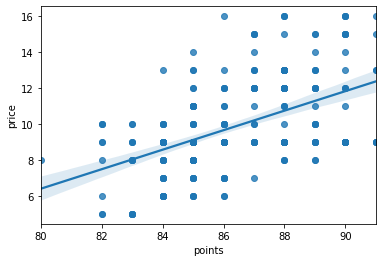

In [12]:
#create scatterplot with regression line
x = df_sales['points']
y = df_sales['price']
sns.regplot(x, y)

<AxesSubplot:xlabel='points', ylabel='price'>

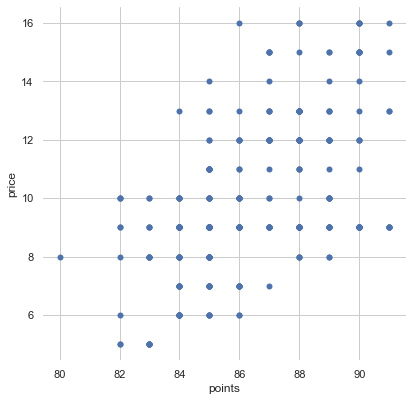

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
price_bin = ["high", "medium", "low"]
sns.scatterplot(x="points", y="price",
                #hue="wine_type", #size="rating_n",
                #palette=SlateGrey, #"ch:r=-.2,d=.3_r",
                hue_order="price_bin",
                linewidth=0,
                data=df_sales, ax=ax)

<AxesSubplot:>

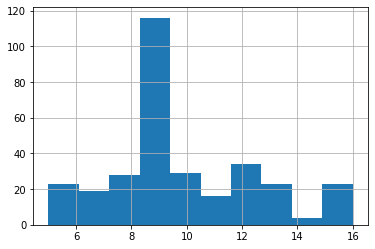

In [6]:
# histogram : the distribution of price
df_sales['price'].hist()

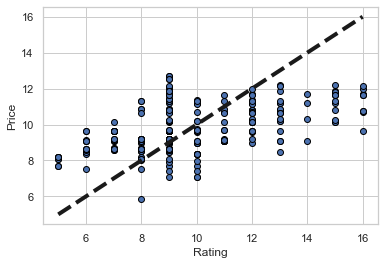

In [14]:
# scatterplot with regression line : the distribution of wine quality ratings

# coefficient of linear model: from points to price (from cross validated)
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
X = df_sales['points']
y = df_sales['price']
#X, y = datasets.load_diabetes(return_X_y=True)

# standardization
#scaler = MinMaxScaler()
sc = StandardScaler()
X = np.array(X)
X_scaled = sc.fit_transform(X.reshape(-1,1))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_scaled, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Rating')
ax.set_ylabel('Price')
plt.show()

# Basic statistics

In [16]:
# min/max price values of white wine data

df_sales_white = df_sales[df_sales['wine_type'] == 'white']
df_sales_white

df_sales_w_price_mean = pd.DataFrame(df_sales_white.groupby('price_bin')['price'].mean())
print('price_mean_white')
print(df_sales_w_price_mean)
df_sales_w_price_min = df_sales_white.groupby('price_bin')['price'].min()
df_sales_w_price_max = df_sales_white.groupby('price_bin')['price'].max()
print('min_white')
print(df_sales_w_price_min)
print('max_white')
print(df_sales_w_price_max)

price_mean_white
               price
price_bin           
high       14.180000
low         7.044776
medium      9.846561
min_white
price_bin
high      13
low        5
medium     9
Name: price, dtype: int64
max_white
price_bin
high      16
low        8
medium    12
Name: price, dtype: int64


In [17]:
# min/max price values of red wine data

df_sales_red = df_sales[df_sales['wine_type'] == 'red']
df_sales_red

df_sales_w_price_mean = pd.DataFrame(df_sales_red.groupby('price_bin')['price'].mean())
print('price_mean_red')
print(df_sales_w_price_mean)
df_sales_w_price_min = df_sales_red.groupby('price_bin')['price'].min()
df_sales_w_price_max = df_sales_red.groupby('price_bin')['price'].max()
print('min_red')
print(df_sales_w_price_min)
print('max_red')
print(df_sales_w_price_max)

price_mean_red
           price
price_bin       
low          5.0
medium       9.5
min_red
price_bin
low       5
medium    9
Name: price, dtype: int64
max_red
price_bin
low        5
medium    10
Name: price, dtype: int64


# Explore sales_data_all (including other countries) 

In [27]:
# load filtered dataset
raw = pd.read_csv("../data/wine_sales_data.csv", sep=",", index_col = [0])

# re-shuffle records just to randomize data points
df_sales_all = raw.sample(frac=1, random_state=42).reset_index(drop=True)

In [28]:
df_sales_target = df_sales_all[['country', 'points', 'price', 'variety']]
df_sales_target.describe() 
#df_sales_all.info #[150930 rows x 11 columns]

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [29]:
df_sales_target['country'] 

0         Argentina
1           Germany
2                US
3             Chile
4                US
            ...    
150925           US
150926       France
150927           US
150928      Germany
150929       France
Name: country, Length: 150930, dtype: object

In [30]:
df_sales_target['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [31]:
sales_country = pd.DataFrame(df_sales_target['country'].value_counts())
sales_country = sales_country.head(14)
sales_country

,country
US,62397
Italy,23478
France,21098
Spain,8268
Chile,5816
Argentina,5631
Portugal,5322
Australia,4957
New Zealand,3320
Austria,3057


In [32]:
target_country = list(df_sales_target['country'].value_counts().index[0:14])
target_country

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Portugal',
 'Australia',
 'New Zealand',
 'Austria',
 'Germany',
 'South Africa',
 'Greece',
 'Israel']

In [35]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

In [36]:
sales_country.country.values

array([62397, 23478, 21098,  8268,  5816,  5631,  5322,  4957,  3320,
        3057,  2452,  2258,   884,   630], dtype=int64)

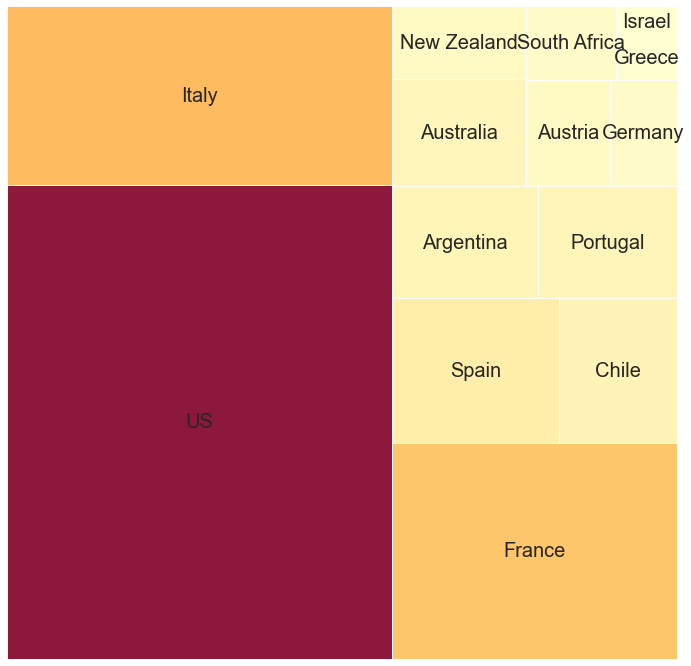

In [37]:
# If you have a data frame?
import matplotlib
import pandas as pd
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

fig, ax = plt.subplots(1, figsize = (12,12))
norm = matplotlib.colors.Normalize(vmin=min(sales_country.country), vmax=max(sales_country.country))
colors = [matplotlib.cm.YlOrRd(norm(value)) for value in sales_country.country.values]

squarify.plot(sizes=sales_country['country'], label=sales_country['country'].index, color = colors, alpha=.9, text_kwargs={'fontsize':20} )
plt.axis('off')
plt.show()

In [39]:
# Creating a bar plot
sns.barplot(x=target_country, y=df_sales_target['price'])
# Add labels to your graph
plt.xlabel('Country')
plt.ylabel('Price')
plt.title("Price of wines in multiple countries")
plt.legend()
plt.show()

KeyError: 'US'

In [38]:
df_sales_target.loc[(df_sales_target['country'] == 'US')].value_counts()

country  points  price  variety                 
US       90      50.0   Pinot Noir                  113
                 45.0   Pinot Noir                  108
         87      20.0   Chardonnay                  107
                 30.0   Chardonnay                   98
                 40.0   Pinot Noir                   91
                                                   ... 
         90      13.0   Rosé                          1
         85      20.0   Rhône-style White Blend       1
         90      14.0   Cabernet Sauvignon            1
         85      20.0   Primitivo                     1
         88      16.0   Bordeaux-style Red Blend      1
Length: 11006, dtype: int64

## Price prediction

In [20]:
# coefficient from linear model predicting price from quality 

reg = LinearRegression().fit(X_scaled, y)
print('coef (price>quality):' + str(reg.coef_)) #array([1.27177039])
print('intercept (price>quality):' +str(reg.intercept_))

coef (price>quality):[1.27177039]
intercept (price>quality):9.885714285714288


In [ ]:
# predicted price - white wine - random forest
# predicted price - red wine - random forest

raw_white = pd.read_csv('../data/wines_white.csv', sep=",", index_col=[0])
raw_white.drop(raw_white.columns[raw_white.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_white_price = raw_white
df_white_price.head(5)

df_white_price['price_est'] = df_white_price['wine_quality_N']
df_white_price['price_est']

In [ ]:
# if you give us composition of wine, machine  will predict the quality of wine, and we suggest you to rate the wine using this range of price. This criteria is suggested from another dataset. 

# source: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

# Modeling - comparison algorithms for wine_price_tag

In [ ]:
# wpr_train_X, wpr_test_X, wpr_train_y, wpr_test_y

# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# load dataset
# set IV and DV
X = df_feature
Y = df_price

# prepare configuration for cross validation test harness
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 20)))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
# evaluate each model in turn - wine_quality
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
 
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# output
# LR: 0.619521 (0.022164)
# KNN: 0.587043 (0.018804)
# RF: 0.814684 (0.011133)
# CART: 0.729568 (0.019463)
# SVM: 0.602586 (0.022230)